In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample fixation data: [subject_id, x, y]
fix_arr = np.array([
    [0, 400, 300],  # Subject 0 fixates at (400, 300)
    [1, 800, 450],  # Subject 1 fixates at (800, 450)
    [2, 1200, 600]  # Subject 2 fixates at (1200, 600)
])

In [45]:
def GaussianMask(sizex, sizey, sigma=10, center=None, fix=1):
    """
    Generate a Gaussian mask.
    sizex  : mask width
    sizey  : mask height
    sigma  : Gaussian standard deviation
    center : Gaussian mean (center of the mask)
    fix    : Maximum value of the Gaussian function
    return : Gaussian mask as a 2D numpy array
    """
    x = np.arange(0, sizex, 1, float)
    # print(x)
    y = np.arange(0, sizey, 1, float)
    x, y = np.meshgrid(x, y) #creates a grid of x and y values 
    print(y.shape)
    print(y)
    if center is None:
        x0 = sizex // 2
        y0 = sizey // 2
    else:
        if not np.isnan(center[0]) and not np.isnan(center[1]):
            x0 = center[0]
            y0 = center[1]
        else:
            return np.zeros((sizey, sizex))
    gaussian_mask = fix * np.exp(-((x - x0) ** 2 / sigma ** 2 + (y - y0) ** 2 / sigma ** 2)) #2D gaussian filter 
    # print(gaussian_mask.shape)
    # print(gaussian_mask)
    return gaussian_mask
def Fixpos2Densemap(fix_arr, width, height):
    """
    Convert fixation positions to a density map.
    fix_arr : array of fixation data [number of subjects x 3(x,y,fixation)]
    width   : output image width
    height  : output image height
    return  : heatmap as a 2D numpy array
    """
    heatmap = np.zeros((height, width), np.float32)
    for n_subject in range(fix_arr.shape[0]):
        center = (fix_arr[n_subject, 1], fix_arr[n_subject, 2])
        place = GaussianMask(width, height, sigma=33, center=center)
        heatmap += place
    heatmap /= fix_arr.shape[0]
    return heatmap



In [46]:
width, height = 1280, 720

# Generate the heatmap
heatmap = Fixpos2Densemap(fix_arr, width, height)
print(heatmap)

(720, 1280)
[[  0.   0.   0. ...   0.   0.   0.]
 [  1.   1.   1. ...   1.   1.   1.]
 [  2.   2.   2. ...   2.   2.   2.]
 ...
 [717. 717. 717. ... 717. 717. 717.]
 [718. 718. 718. ... 718. 718. 718.]
 [719. 719. 719. ... 719. 719. 719.]]
(720, 1280)
[[  0.   0.   0. ...   0.   0.   0.]
 [  1.   1.   1. ...   1.   1.   1.]
 [  2.   2.   2. ...   2.   2.   2.]
 ...
 [717. 717. 717. ... 717. 717. 717.]
 [718. 718. 718. ... 718. 718. 718.]
 [719. 719. 719. ... 719. 719. 719.]]
(720, 1280)
[[  0.   0.   0. ...   0.   0.   0.]
 [  1.   1.   1. ...   1.   1.   1.]
 [  2.   2.   2. ...   2.   2.   2.]
 ...
 [717. 717. 717. ... 717. 717. 717.]
 [718. 718. 718. ... 718. 718. 718.]
 [719. 719. 719. ... 719. 719. 719.]]
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 

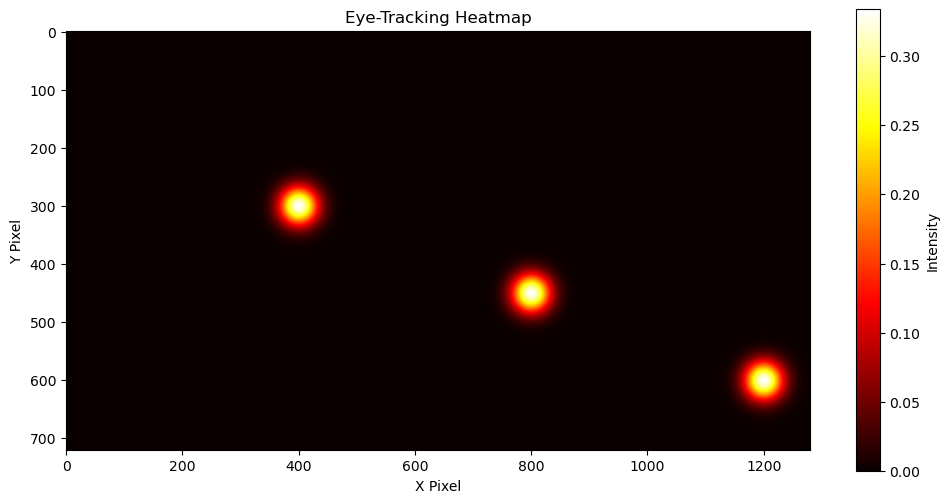

In [29]:
plt.figure(figsize=(12, 6))
plt.imshow(heatmap, cmap='hot')
plt.title('Eye-Tracking Heatmap')
plt.colorbar(label='Intensity')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()

# for fixation in fix_arr:
#     x, y = fixation[1], fixation[2]
#     intensity = heatmap[int(y), int(x)]
#     plt.scatter(x, y, marker='o', color='cyan', edgecolors='white', s=50)
#     plt.text(x, y, f"{intensity:.2f}", color='white', ha='center', va='center', fontsize=8, fontweight='bold')

# plt.show()